### Import Library

In [5]:
# import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [6]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

### Quick Look

In [7]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [8]:
print("There are",df.shape[0],"observations, and",df.shape[1],"features")

There are 5630 observations, and 20 features


In [9]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


# 1. Exploratory Data Analysis (EDA)

## 1.1 Cleansing Data

### 1.1.1 Clean Duplicates Data

In [10]:
# Check Duplicate data
print("Is there any duplicate?",df.duplicated().any())
print("How many duplicate?",df.duplicated().sum())

Is there any duplicate? False
How many duplicate? 0


### 1.1.2 Check Missing Values and Data Type

In [11]:
# Check Data Type of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [12]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Perc of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]

In [13]:
missing_data(df)

,columns,Num of Miss,Perc of Miss
2,Tenure,264,4.689165
5,WarehouseToHome,251,4.458259
8,HourSpendOnApp,255,4.529307
15,OrderAmountHikeFromlastYear,265,4.706927
16,CouponUsed,256,4.547069
17,OrderCount,258,4.582593
18,DaySinceLastOrder,307,5.452931


### 1.1.3 Check Distribution of Numerical Features

In [14]:
# Select only numerical features
numerical = df.select_dtypes(include='number')

In [15]:
numerical.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

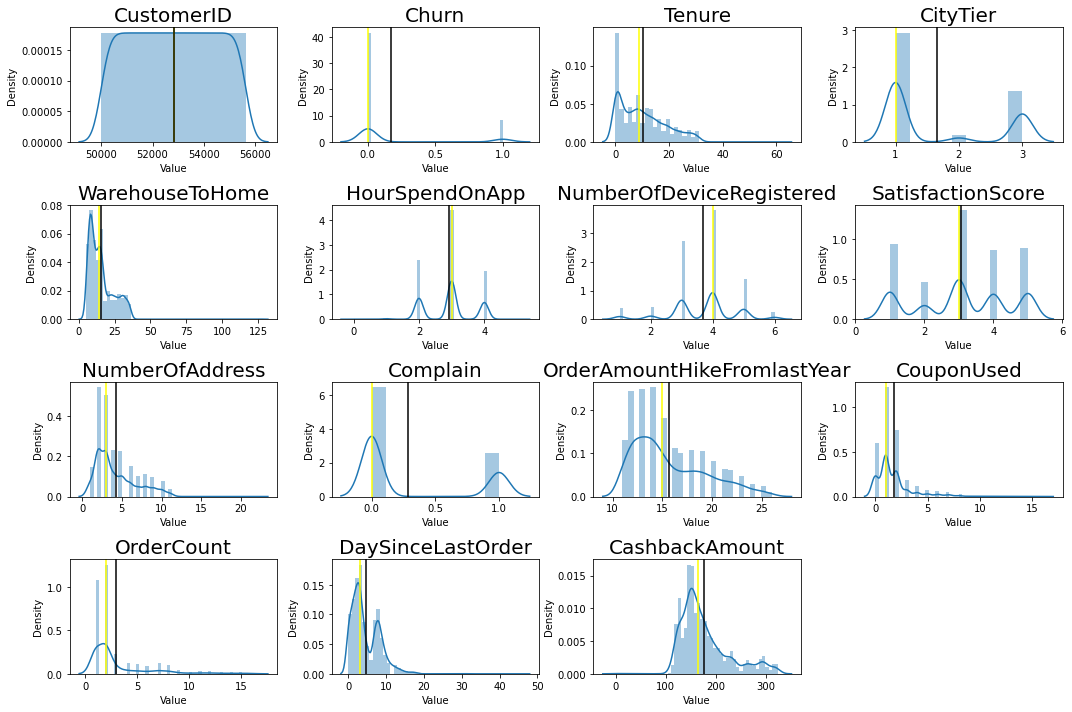

In [16]:
plt.figure(1, figsize=(15, 10))
for i, x in enumerate(numerical.columns):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    sns.distplot(numerical[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
    plt.axvline(numerical[x].median(),color='yellow')
    plt.axvline(numerical[x].mean(),color='black')
plt.show()

### 1.1.4 Impute Missing Values


Source: https://medium.com/swlh/missing-data-imputation-in-feature-engineering-aeefd03ba58d

In [17]:
# We will impute some of variables with median they are skewed data
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].median())
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

In [18]:
# Although the variable is numerical but it has characteristic like categorical
# therefore we should impute missing value with mode or the most frequent data of the variable
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0])

### 1.1.5 Handle Outliers

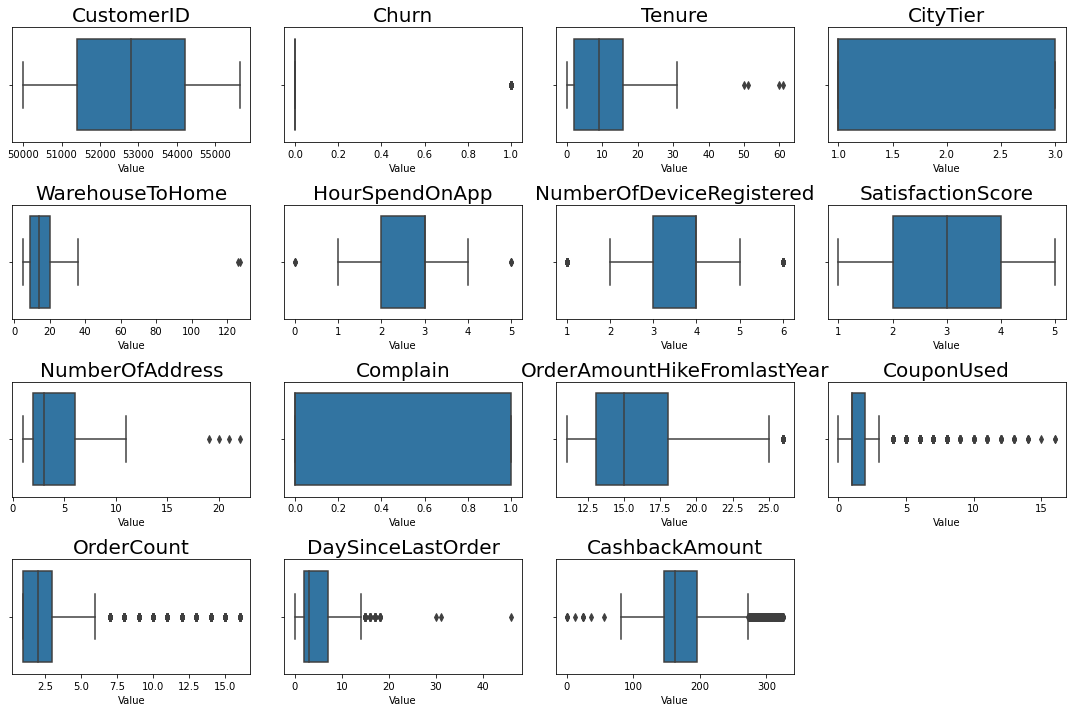

In [19]:
# Before handling outliers
plt.figure(1, figsize=(15, 10))
for i, x in enumerate(numerical.columns):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    sns.boxplot(numerical[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
plt.show()

In [20]:
# Select certain variables to handle outliers
numeric_outlier = numerical[['Tenure','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress']]

In [21]:
# Define function to handle outliers
# If there are outliers greater than upper bond, those outliers will be replace by upper bond value
# If there are outliers less than lower bond, those outliers will be replace by lower bond value
def outlier_handling(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bond = Q1 - 1.5*IQR
    upper_bond = Q3 + 1.5*IQR 
    data.loc[numerical[column]>upper_bond, column] = upper_bond
    data.loc[numerical[column]<lower_bond, column] = lower_bond

In [34]:
# Use the custome function to handle outliers
for col in numeric_outlier.columns:
  outlier_handling(df, col)

## 1.2 Make Some Visualization

In [36]:
# Define function for showing total number in graph
def showNumber(ax):
    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is the data value and can be used as the label
        label_text = int(height)  

        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

        # plot only when height is greater than specified value
        if height > 0:
            ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=15)

### 1.2.1 Distribution of Features

- Categorical Features

In [41]:
categorical = df.select_dtypes(include=['object'])

In [42]:
categorical.columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus', 'Churn_Cat'],
      dtype='object')

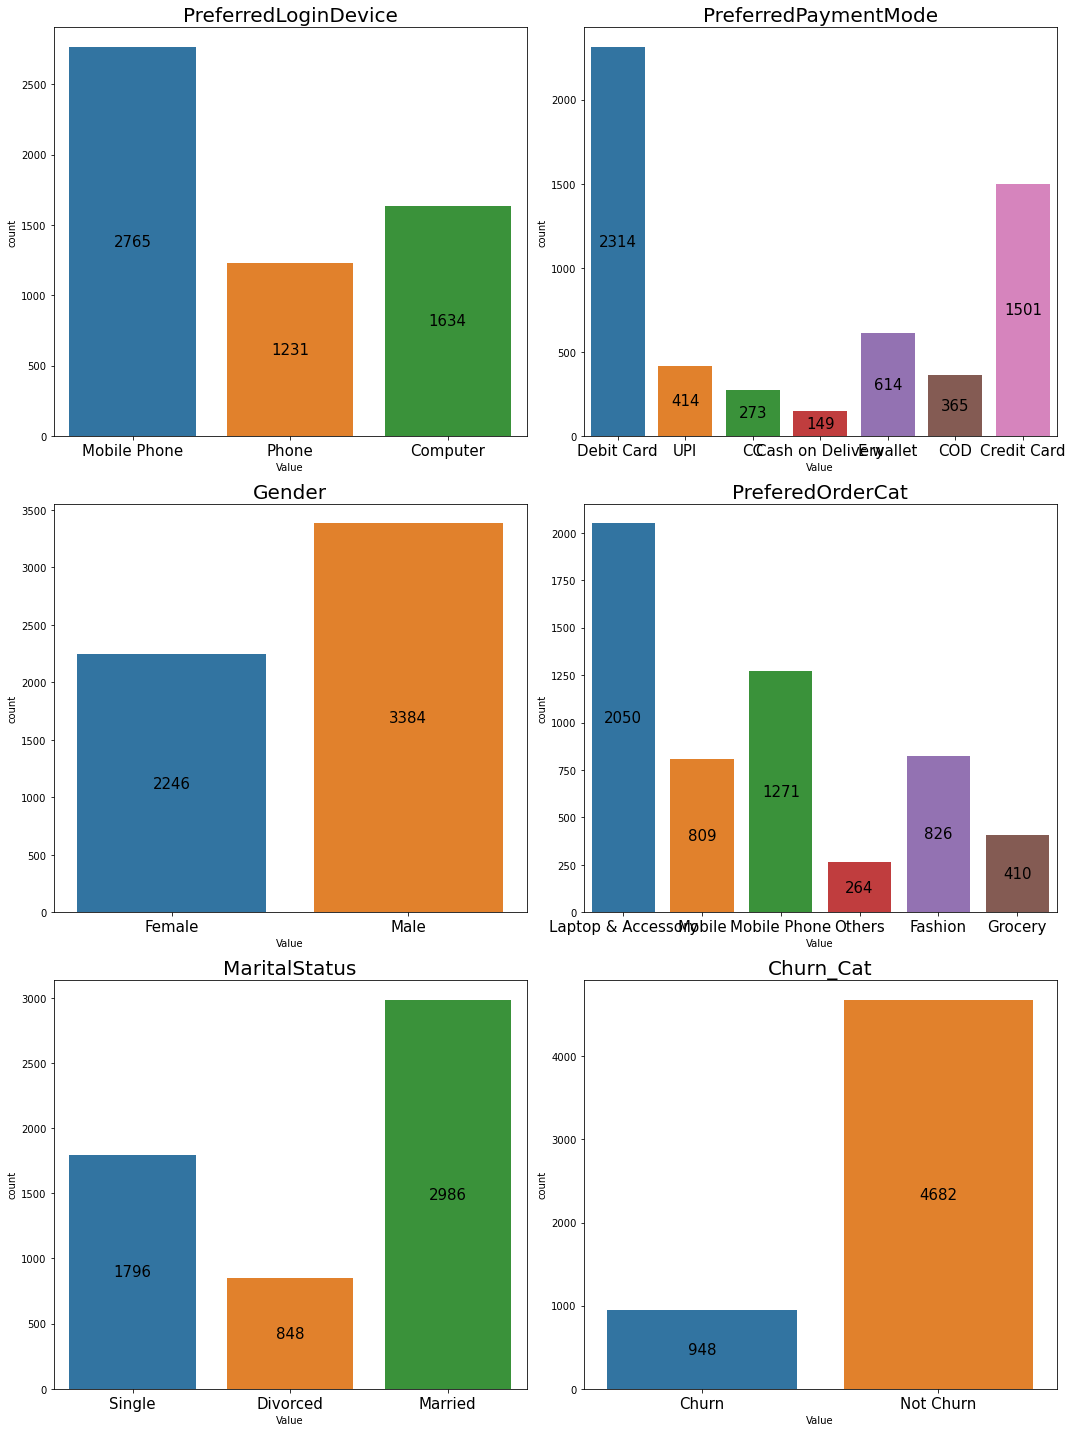

In [52]:
# Count of each feature value
plt.figure(1, figsize=(15, 20))
for i, x in enumerate(categorical.columns):
    plt.subplot(3,2,i+1)
    plt.tight_layout()
    ax = sns.countplot(categorical[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
    plt.xticks(size=15)
    showNumber(ax)
plt.show()

### 1.2.2 Correlation

<AxesSubplot:>

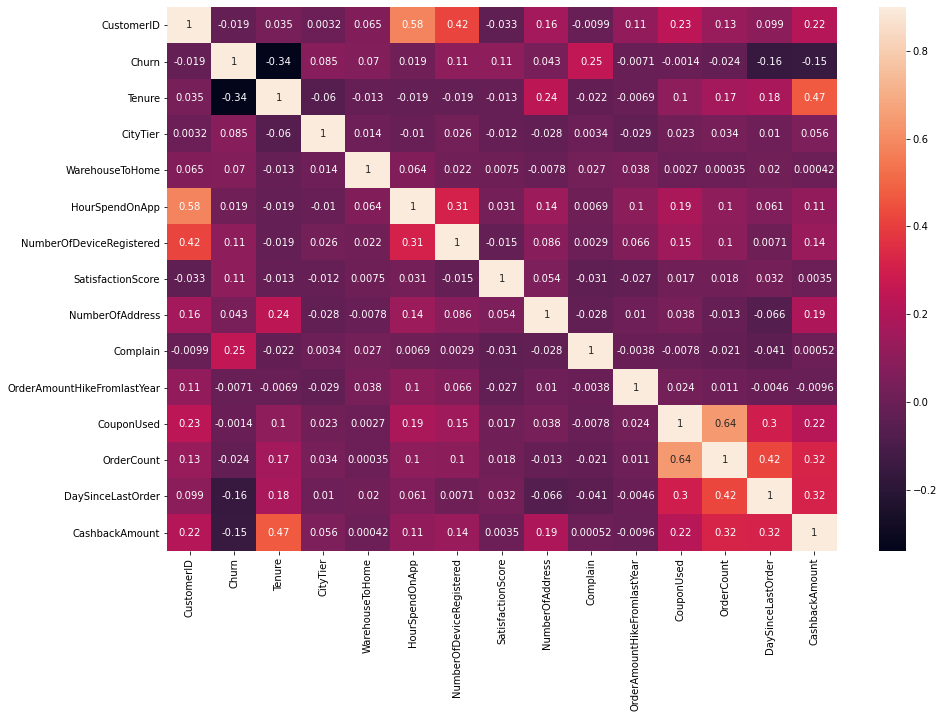

In [53]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmax=0.9, annot=True)

### 1.2.3 Insights

In [54]:
# Create new categorical variables for further visualization
df['Churn_Cat'] = df['Churn'].map({0: 'Not Churn', 1 : 'Churn'})

### A) Total Customers Who is Churn or Not Based on Their Prefered Order Category

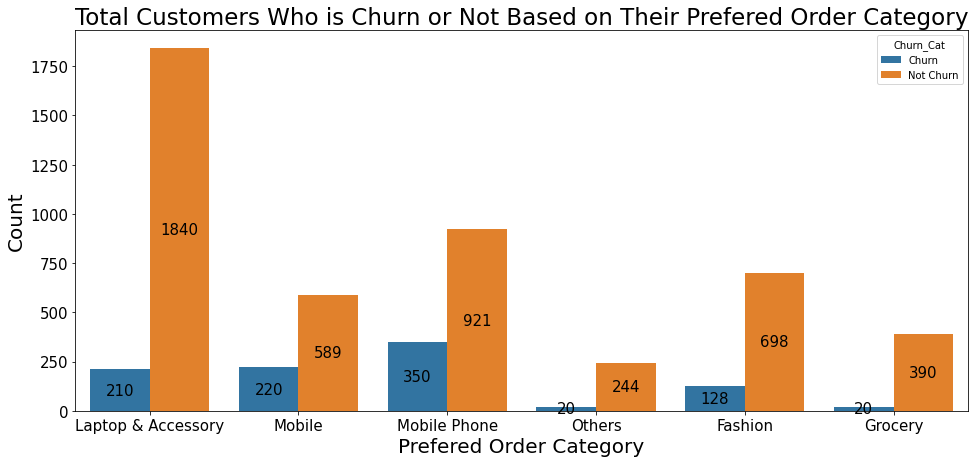

In [55]:
plt.figure(1, figsize=(16, 7))
plt.title('Total Customers Who is Churn or Not Based on Their Prefered Order Category', fontsize=23)
ax = sns.countplot(df['PreferedOrderCat'], hue=df['Churn_Cat'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Prefered Order Category', size=20)
plt.ylabel('Count', size=20)
showNumber(ax)

### B) Total Customers Who Prefered Login From Certain Device Based on Churn Status

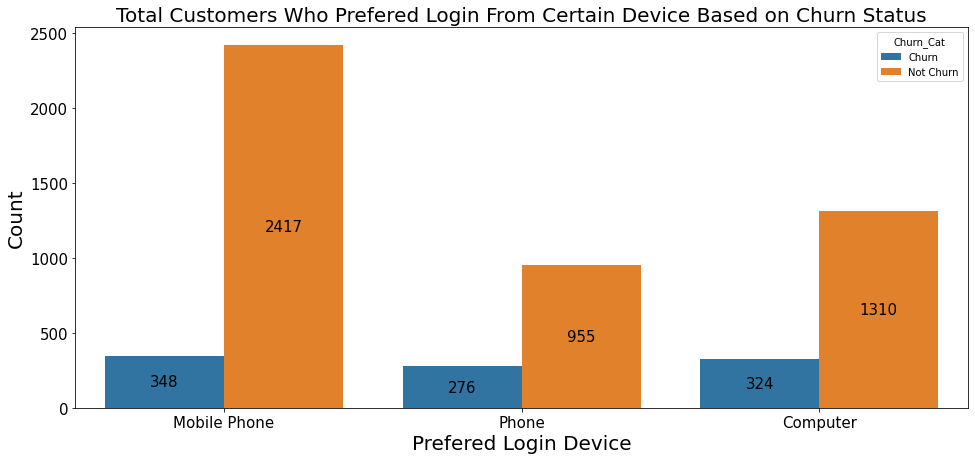

In [56]:
plt.figure(1, figsize=(16, 7))
plt.title('Total Customers Who Prefered Login From Certain Device Based on Churn Status' ,fontsize=20)
ax=sns.countplot(df['PreferredLoginDevice'], hue=df['Churn_Cat'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Prefered Login Device', size=20)
plt.ylabel('Count', size=20)
showNumber(ax)

### C) Total Customers Who Prefered Payment From Certain Method Based on Churn Status

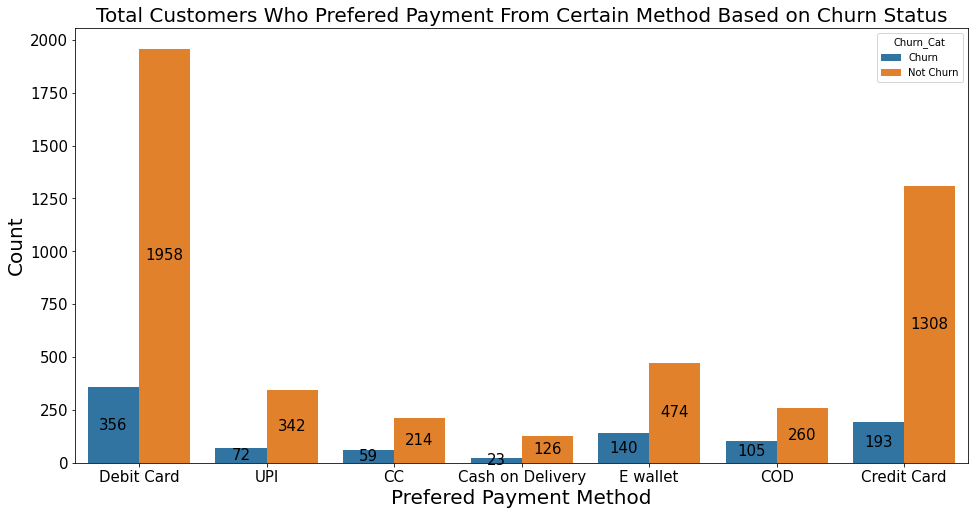

In [57]:
plt.figure(1, figsize=(16, 8))
plt.title('Total Customers Who Prefered Payment From Certain Method Based on Churn Status' ,fontsize=20)
ax=sns.countplot(df['PreferredPaymentMode'], hue=df['Churn_Cat'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Prefered Payment Method', size=20)
plt.ylabel('Count', size=20)
showNumber(ax)